**Importing libraries and loading the dataset** 

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

Exploring the iris dataset

In [4]:
#Checking for the properties and methods
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
##checking the shape of the dataset
iris.data.shape

(150, 4)

In [6]:
##viewing the first 5 rows of the data
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
#Converting the data to a dataframe
Iris = pd.DataFrame(iris.data)
Iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#adding the dependent variable to the dataframe
Iris['species'] = iris.target

In [9]:
Iris.head()

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
Iris.species.unique()

array([0, 1, 2])

In [11]:
#inspecting the names of the dependent variable
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

From here, we understand that index 0 is assigned to Setosa, 1 to versicolor and 2 to virginica

In [12]:
#inspecting the names of the independent variables(features)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
#Renaming the columns with appropriate features
Iris.rename(columns = {0 : "sepal_length", 1 : "sepal_width", 2 : "petal_length", 3 : "petal_width"}, inplace = True)
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
Iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

**Model Training**

In [16]:
x = Iris.drop("species", axis = 1)
y = Iris.species

In [19]:
#splitting data into train snd test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

(38,)

In [20]:
#model fitting
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators = 20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

Evaluating the model

In [21]:
model.score(x_test, y_test)

0.9736842105263158

In [22]:
y_pred = model.predict(x_test)
y_act = y_test.copy()

In [23]:
from sklearn.metrics import confusion_matrix
con_max = confusion_matrix(y_act, y_pred)
con_max

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Text(33.0, 0.5, 'True Value')

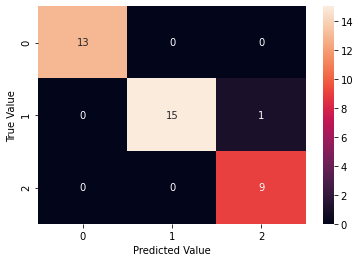

In [29]:
##visualizing confusion matrix
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))
sns.heatmap(con_max, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

This shows that our model correctly made predictions of the species, except for once where it mistook versicolor for virginica specie